In [1]:
import pandas as pd
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
import time
from datetime import datetime


In [2]:
df = pd.read_json(r"C:\Users\10725950\Desktop\data.json")
df

,took,timed_out,_shards,hits,aggregations
total,198,False,12.0,"{'value': 80, 'relation': 'eq'}",NaN
successful,198,False,12.0,NaN,NaN
skipped,198,False,9.0,NaN,NaN
failed,198,False,0.0,NaN,NaN
max_score,198,False,NaN,None,NaN
hits,198,False,NaN,"[{'_index': '.ds-processstream-000005', '_type...",NaN
2,198,False,NaN,NaN,{'buckets': [{'key_as_string': '2023-10-22T02:...


In [3]:
df1=pd.DataFrame.from_dict(df['hits']['hits'])
df2=dict(df1['_source'])
dff=[]
for i in df2.items():
    dff.append(i[1])
result=pd.DataFrame.from_dict(dff)
result



,lastPolledAt,cpuUtilization(%),runByUser,processName,processID,processStartTime,virtualMemorySize(in MB),memoryUtilization(%),ciName,toolOrgId,organizationId,source
0,2023-10-22T02:00:51Z,0.01,None,csrss,608,2023-10-22T01:02:18Z,667.660156,0.00,AWNCK006,2001,1408158,Solarwinds
1,2023-10-22T02:00:51Z,0.01,None,dcondemand,7032,2023-10-22T01:02:52Z,118.199219,0.58,AWNCK006,2001,1408158,Solarwinds
2,2023-10-22T02:00:51Z,0.00,None,Idle,0,2023-10-22T01:02:20Z,0.062500,0.00,AWNCK006,2001,1408158,Solarwinds
3,2023-10-22T02:00:51Z,0.02,None,macompatsvc,328,2023-10-22T01:02:59Z,92.480469,0.36,AWNCK006,2001,1408158,Solarwinds
4,2023-10-22T02:00:51Z,0.10,None,masvc,1988,2023-10-22T01:02:21Z,92.480469,0.00,AWNCK006,2001,1408158,Solarwinds
5,2023-10-22T02:00:51Z,0.14,None,mfeesp,6880,2023-10-22T01:02:49Z,92.480469,0.00,AWNCK006,2001,1408158,Solarwinds
6,2023-10-22T02:00:51Z,0.01,None,mfehcs,7040,2023-10-22T01:02:52Z,48.464844,0.18,AWNCK006,2001,1408158,Solarwinds
7,2023-10-22T02:00:51Z,0.02,None,mfemactl,6128,2023-10-22T01:03:07Z,107.019531,0.28,AWNCK006,2001,1408158,Solarwinds
8,2023-10-22T02:00:51Z,0.66,None,mfetp,6408,2023-10-22T01:02:55Z,77.917969,0.00,AWNCK006,2001,1408158,Solarwinds
9,2023-10-22T02:00:51Z,0.34,None,mfevtps,6520,2023-10-22T01:02:44Z,57.742188,0.27,AWNCK006,2001,1408158,Solarwinds


In [4]:
result['processStartTime']=pd.to_datetime(result['processStartTime'])
l=[]
for i in result['processStartTime']:
    l.append(i.timestamp())
result['time']=l
result



,lastPolledAt,cpuUtilization(%),runByUser,processName,processID,processStartTime,virtualMemorySize(in MB),memoryUtilization(%),ciName,toolOrgId,organizationId,source,time
0,2023-10-22T02:00:51Z,0.01,None,csrss,608,2023-10-22 01:02:18+00:00,667.660156,0.00,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
1,2023-10-22T02:00:51Z,0.01,None,dcondemand,7032,2023-10-22 01:02:52+00:00,118.199219,0.58,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
2,2023-10-22T02:00:51Z,0.00,None,Idle,0,2023-10-22 01:02:20+00:00,0.062500,0.00,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
3,2023-10-22T02:00:51Z,0.02,None,macompatsvc,328,2023-10-22 01:02:59+00:00,92.480469,0.36,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
4,2023-10-22T02:00:51Z,0.10,None,masvc,1988,2023-10-22 01:02:21+00:00,92.480469,0.00,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
5,2023-10-22T02:00:51Z,0.14,None,mfeesp,6880,2023-10-22 01:02:49+00:00,92.480469,0.00,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
6,2023-10-22T02:00:51Z,0.01,None,mfehcs,7040,2023-10-22 01:02:52+00:00,48.464844,0.18,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
7,2023-10-22T02:00:51Z,0.02,None,mfemactl,6128,2023-10-22 01:03:07+00:00,107.019531,0.28,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
8,2023-10-22T02:00:51Z,0.66,None,mfetp,6408,2023-10-22 01:02:55+00:00,77.917969,0.00,AWNCK006,2001,1408158,Solarwinds,1.697937e+09
9,2023-10-22T02:00:51Z,0.34,None,mfevtps,6520,2023-10-22 01:02:44+00:00,57.742188,0.27,AWNCK006,2001,1408158,Solarwinds,1.697937e+09


In [5]:

r=pd.DataFrame()
r['time1']=result['processStartTime']
r['processStartTime']=result['time']

r['cpuUtilization(%)']=result['cpuUtilization(%)'].astype(float)*100
r['cpuUtilization(%)']=r['cpuUtilization(%)'].astype(int)
# r=pd.DataFrame.from_dict(r)
# r=r.groupby('processStartTime',as_index=False).agg({'cpuUtilization(%)':'sum'})
r['processStartTime']=label_encoder.fit_transform(r['processStartTime'])
# r['cpuUtilization(%)']=label_encoder.fit_transform(r['cpuUtilization(%)'])
r

,time1,processStartTime,cpuUtilization(%)
0,2023-10-22 01:02:18+00:00,0,1
1,2023-10-22 01:02:52+00:00,5,1
2,2023-10-22 01:02:20+00:00,1,0
3,2023-10-22 01:02:59+00:00,7,2
4,2023-10-22 01:02:21+00:00,2,10
5,2023-10-22 01:02:49+00:00,4,14
6,2023-10-22 01:02:52+00:00,5,1
7,2023-10-22 01:03:07+00:00,8,2
8,2023-10-22 01:02:55+00:00,6,66
9,2023-10-22 01:02:44+00:00,3,34


In [6]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import r2_score

In [7]:
X=r[['processStartTime']]
y=r['cpuUtilization(%)']


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.2)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
y_pred

array([31.53571429, 21.17857143])

In [27]:

accuracy = r2_score(y_test,y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: -255806.63%


In [28]:
reg.predict([[6]])

C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.63095238])

In [21]:
import matplotlib.pyplot as plot
import seaborn as sn

<Axes: xlabel='time1', ylabel='cpuUtilization(%)'>

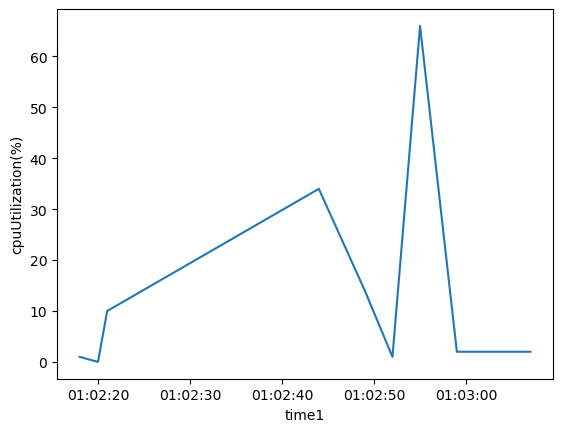

In [29]:
sn.lineplot(x='time1',y='cpuUtilization(%)',data=r)